In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Indicators by country

In [28]:
HDI_df = pd.read_csv('Human_Development_Index_HDI.csv', sep=',', header=0,quotechar='\"')
print(HDI_df.shape)
HDI_df.head()

(206, 31)


,HDI_Rank_(2018),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,170,Afghanistan,0.298,0.304,0.312,0.308,0.303,0.327,0.331,0.335,...,0.447,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496
1,69,Albania,0.644,0.625,0.608,0.611,0.617,0.629,0.639,0.639,...,0.729,0.740,0.759,0.771,0.781,0.787,0.788,0.788,0.789,0.791
2,82,Algeria,0.578,0.582,0.589,0.593,0.597,0.602,0.610,0.619,...,0.720,0.730,0.738,0.737,0.746,0.749,0.751,0.755,0.758,0.759
3,36,Andorra,..,..,..,..,..,..,..,..,...,0.830,0.828,0.827,0.849,0.846,0.853,0.850,0.854,0.852,0.857
4,149,Angola,..,..,..,..,..,..,..,..,...,0.508,0.510,0.525,0.537,0.547,0.557,0.565,0.570,0.576,0.574


In [114]:
ihdi_df = pd.read_excel('IHDI_HDI_Gini_country_region.xlsx', sheet_name='by_country')
print(hdi_df.shape)
ihdi_df.head()
sorted_ihdi_df=ihdi_df.sort_values(by='Country')
sorted_ihdi_df.head()

(195, 6)


,Country,Category,HDI (2018),IHDI (2018),Gini Coefficient(%)
169,Afghanistan,low human development,0.495960,NaN,NaN
68,Albania,high human development,0.791406,0.704804,29.0
81,Algeria,high human development,0.758978,0.604354,27.6
35,Andorra,very high human development,0.856781,NaN,NaN
148,Angola,medium human development,0.574488,0.392022,42.7


In [115]:
mpi_df=pd.read_excel('IHDI_HDI_Gini_country_region.xlsx', sheet_name='MPI')
mpi_df

,Country,Year and survey,Population in Multidimensional poverty (%),Population Vulnerable to Multidimensional poverty (%)
0,Afghanistan,2015/2016 D,55.910242,18.137625
1,Albania,2017/2018 D,0.703561,5.040320
2,Algeria,2012/2013 M,2.100729,5.836775
3,Angola,2015/2016 D,51.104110,15.542856
4,Armenia,2015/2016 D,0.186516,2.717535
...,...,...,...,...
96,Vanuatu,2007 M,38.762772,32.295159
97,Viet Nam,2013/2014 M,4.895178,5.619922
98,Yemen,2013 D,47.698307,22.074686
99,Zambia,2013/2014 D,53.243721,22.481249


In [143]:
cpi_df=pd.read_excel('IHDI_HDI_Gini_country_region.xlsx', sheet_name='CPI')
cpi_df['last_percent_change_CPI']=(cpi_df['Last CPI']-cpi_df['Previous CPI'])*100/cpi_df['Previous CPI']
cpi_df

,Country,Last CPI,Previous CPI,Reference last CPI,last_percent_change_CPI
0,Afghanistan,1.170000e+02,1.180000e+02,2020-02-01,-0.847458
1,Albania,1.100000e+02,1.100000e+02,2020-03-01,0.000000
2,Algeria,2.200000e+02,2.200000e+02,2020-02-01,0.000000
3,Angola,2.870000e+02,2.820000e+02,2020-03-01,1.773050
4,Argentina,3.060000e+02,2.960000e+02,2020-03-01,3.378378
...,...,...,...,...,...
170,Vanuatu,1.600000e+02,1.580000e+02,2019-12-01,1.265823
171,Venezuela (Bolivarian Republic of),1.660971e+10,1.204396e+10,2019-12-01,37.909000
172,Viet Nam,1.170000e+02,1.180000e+02,2020-03-01,-0.847458
173,Zambia,2.550000e+02,2.520000e+02,2020-03-01,1.190476


In [144]:
indicators_df = pd.merge(sorted_ihdi_df, mpi_df, how='outer', on='Country')
indicators_df = pd.merge(indicators_df, cpi_df, how='left', on='Country')
indicators_df = indicators_df.set_index('Country')
indicators_df.head(10)

,Category,HDI (2018),IHDI (2018),Gini Coefficient(%),Year and survey,Population in Multidimensional poverty (%),Population Vulnerable to Multidimensional poverty (%),Last CPI,Previous CPI,Reference last CPI,last_percent_change_CPI
Country,,,,,,,,,,,
Afghanistan,low human development,0.495960,NaN,NaN,2015/2016 D,55.910242,18.137625,117.0,118.0,2020-02-01,-0.847458
Albania,high human development,0.791406,0.704804,29.0,2017/2018 D,0.703561,5.040320,110.0,110.0,2020-03-01,0.000000
Algeria,high human development,0.758978,0.604354,27.6,2012/2013 M,2.100729,5.836775,220.0,220.0,2020-02-01,0.000000
Andorra,very high human development,0.856781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
Angola,medium human development,0.574488,0.392022,42.7,2015/2016 D,51.104110,15.542856,287.0,282.0,2020-03-01,1.773050
Antigua and Barbuda,high human development,0.776163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
Argentina,very high human development,0.830096,0.713738,40.6,NaN,NaN,NaN,306.0,296.0,2020-03-01,3.378378
Armenia,high human development,0.760011,0.684842,33.6,2015/2016 D,0.186516,2.717535,132.0,131.0,2020-03-01,0.763359
Australia,very high human development,0.938379,0.862000,35.8,NaN,NaN,NaN,116.0,115.0,2019-12-01,0.869565


In [145]:
indicators_df.to_excel('indicators_by_country.xlsx', index=True)

# Visualization

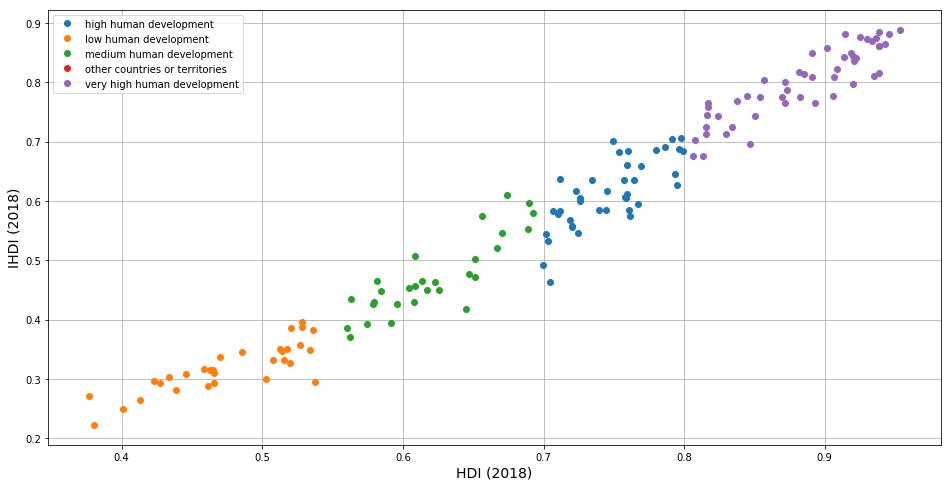

In [121]:
fig, ax = plt.subplots(figsize=(16,8))

#Data
x_label='HDI (2018)'
y_label='IHDI (2018)'
x =indicators_df[x_label].values
y =indicators_df[y_label].values
labels = indicators_df['Category'].values
df = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df.groupby('label')

# Plot
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=6, label=name)
    ax.legend()
    
ax.set_xlabel(x_label, fontsize=14)
ax.set_ylabel(y_label, fontsize=14)
ax.grid()

plt.show()

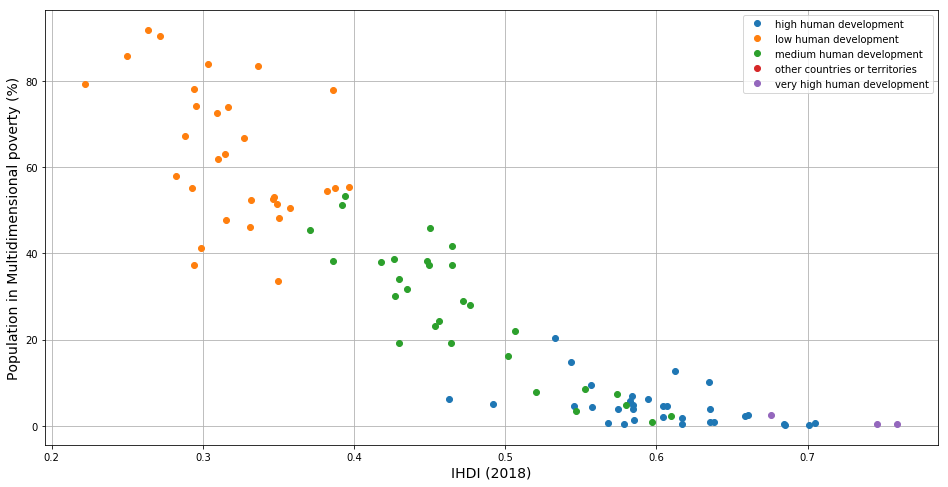

In [124]:
fig, ax = plt.subplots(figsize=(16,8))

#Data
x_label='IHDI (2018)'
y_label='Population in Multidimensional poverty (%)'
x =indicators_df[x_label].values
y =indicators_df[y_label].values
labels = indicators_df['Category'].values
df = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df.groupby('label')

# Plot
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=6, label=name)
    ax.legend()
    
ax.set_xlabel(x_label, fontsize=14)
ax.set_ylabel(y_label, fontsize=14)
ax.grid()

plt.savefig('IHDI vs PMI')

plt.show()

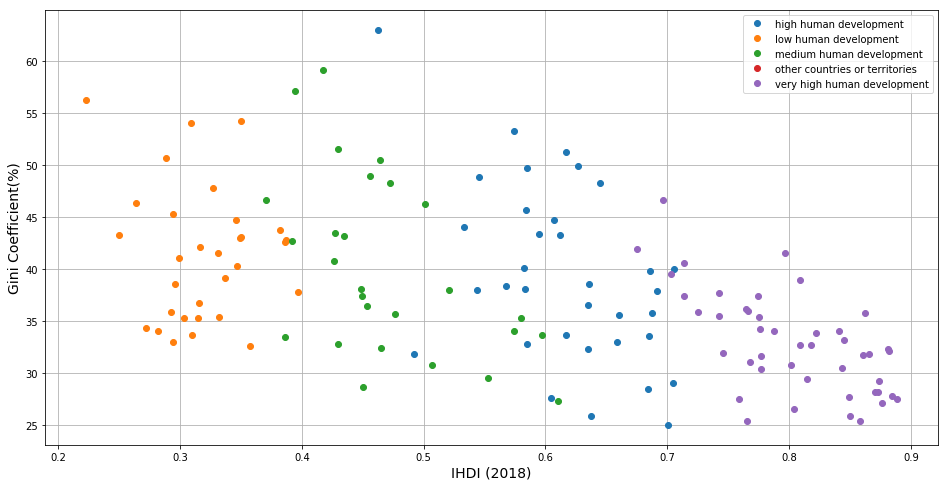

In [122]:
fig, ax = plt.subplots(figsize=(16,8))

#Data
x_label='IHDI (2018)'
y_label='Gini Coefficient(%)'
x =indicators_df[x_label].values
y =indicators_df[y_label].values
labels = indicators_df['Category'].values
df = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df.groupby('label')

# Plot
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=6, label=name)
    ax.legend()
    
ax.set_xlabel(x_label, fontsize=14)
ax.set_ylabel(y_label, fontsize=14)
ax.grid()

plt.show()

# Indicators by region

In [49]:
indicators_region_df = pd.read_excel('IHDI_HDI_Gini_country_region.xlsx', sheet_name='by_region')
print(indicators_region_df.shape)
indicators_region_df

(6, 6)


,Region,HDI (2018),IHDI (2018),Coefficient of human inequality (2018),Inequality in income (2018),Inequality-adjusted income index (2018)
0,Arab States,0.703107,0.530722,24.183880,25.015258,0.571075
1,East Asia and the Pacific,0.740919,0.617992,16.312818,25.569156,0.560217
2,Europe and Central Asia,0.778656,0.687852,11.582138,16.770011,0.634064
3,Latin America and the Caribbean,0.758572,0.589460,21.715968,34.116782,0.490775
4,South Asia,0.642274,0.476091,25.346578,18.373851,0.520163
5,Sub-Saharan Africa,0.540527,0.375673,30.448019,27.641166,0.386819
